In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

### In an Image

In [9]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_images = cv2.bitwise_and(img, mask)
    return masked_images

In [10]:
def draw_lines(img_1, lines):
    img = np.copy(img_1)
    blank_img = np.zeros(img.shape, dtype = np.uint8)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_img, (x1, y1), (x2, y2), (0, 255, 0), 5)
    
    img = cv2.addWeighted(img, 0.8, blank_img, 1, 0.0)
    return img

(607, 1124, 3)


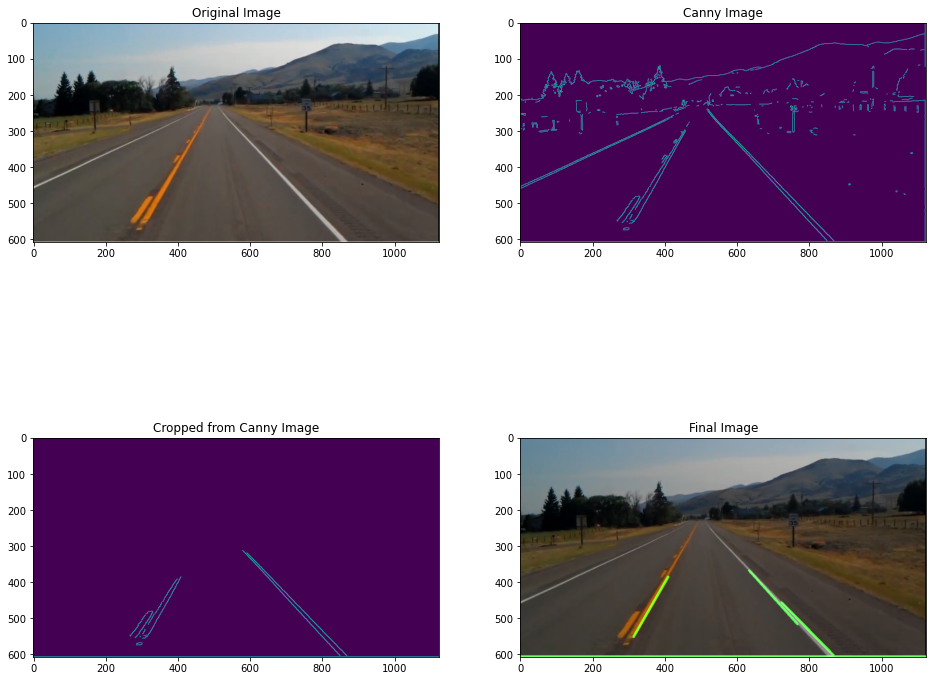

In [13]:
image = cv2.imread('Images/road.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [(0, height), (width/2, (height)/2), (width, height)]

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny_image = cv2.Canny(gray_image, 100, 120)

cropped_image = region_of_interest(canny_image, np.array([region_of_interest_vertices], np.int32))

lines = cv2.HoughLinesP(cropped_image, theta = np.pi/60, rho= 2., threshold = 160, lines = np.array([]), 
                       minLineLength = 40, maxLineGap = 100)

img_with_lines = draw_lines(image, lines)

plt.figure(figsize= (16, 14))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(2, 2, 3)
plt.title('Cropped from Canny Image')
plt.imshow(cropped_image)

plt.subplot(2, 2, 2)
plt.title('Canny Image')
plt.imshow(canny_image)

plt.subplot(2, 2, 4)
plt.title('Final Image')
plt.imshow(img_with_lines)
plt.show()

In [4]:
(255, )*3

(255, 255, 255)

### In a Video

In [2]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_images = cv2.bitwise_and(img, mask)
    return masked_images

In [3]:
def draw_lines(img_1, lines):
    img = np.copy(img_1)
    blank_img = np.zeros(img.shape, dtype = np.uint8)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_img, (x1, y1), (x2, y2), (0, 255, 0), 5)
    
    img = cv2.addWeighted(img, 0.8, blank_img, 1, 0.0)
    return img

In [14]:

def process(image):
    
    height = image.shape[0]
    width = image.shape[1]

    region_of_interest_vertices = [(0, height), (width/2, (height)/2), (width, height)]

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    canny_image = cv2.Canny(gray_image, 100, 120)

    cropped_image = region_of_interest(canny_image, np.array([region_of_interest_vertices], np.int32))

    lines = cv2.HoughLinesP(cropped_image, theta = np.pi/60, rho= 2., threshold = 50, lines = np.array([]), 
                       minLineLength = 40, maxLineGap = 100)

    img_with_lines = draw_lines(image, lines)

    return img_with_lines

cap = cv2.VideoCapture('Videos/Road.mp4')
while(cap.isOpened()):
    ret , frame= cap.read()
    
    if ret == True:
        frame = process(frame)
        cv2.imshow('Frame', frame)
        if(cv2.waitKey(1) & 0xFF == ord('q')):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()
